In [1]:
import sys
sys.path.append('src')
from src import helperfunctions as hf
from src import SABR
from src.SABR_IV_approximators import Hagan, AntonovApprox, AntonovExact, AntonovANN, AntonovANN_4layer

from src.classes import MatlabMonteCarlo

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

save_path = r"C:\Users\hugo\OneDrive\Documents\Quantitative Finance\Thesis\Plots"
data_path = r"C:\Users\hugo\OneDrive\Documents\Quantitative Finance\Thesis\Data"
colors = ['#d7191c','#fdae61','#abd9e9','#2c7bb6']

In [3]:
MMC = MatlabMonteCarlo()

C:\Users\hugo\OneDrive\Documents\Quantitative Finance\Thesis\Code\matlab_code


### Bad Hagan fit

In [56]:
T = 30/365
r=0.0
alpha =0.5
beta = 0.5
rho = -.6
v = 3.
# smile = hf.simulateSABRSmile(1e5, 50, T, r, 1, alpha, beta, rho, v, (0.4,1.65,0.05), 43)
smile = MMC.simulateSABRSmile(2.5e5, 50, T, r, 1.0, alpha, beta, rho, v, (0.4,1.65,0.05), smoothing=False)

In [57]:
delta_real = SABR.delta(AntonovANN(), alpha, beta, rho, v, (1,1), T)
vega_real = SABR.vega(AntonovANN(), alpha, beta, rho, v, (1,1), T)

delta_real = float(smile.loc[smile['strike'] == 1.0, 'delta'])
vega_real = float(smile.loc[smile['strike'] == 1.0, 'vega'])


dF: 0.6609665000878451
1.0026168596111162


In [58]:
print(delta_real)
print(vega_real)

0.608779847198636
0.11441666518885736


In [59]:
fit = SABR.add_fit([ AntonovANN(), Hagan()], alpha=alpha, beta=beta, rho=rho, v=v, market_smile=smile.copy(), strike_price=False)
fit = fit.set_index('strike_price')

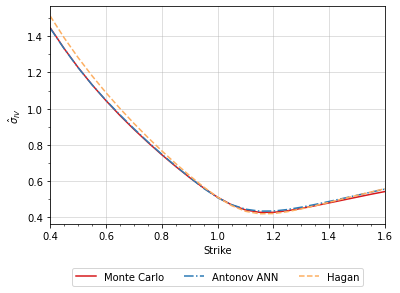

In [60]:
ax = plt.subplot()
plt.plot(fit['impl_volatility'], color=colors[0])
plt.plot(fit['Antonov ANN'], color=colors[3], ls='-.')
plt.plot(fit['Hagan'], color=colors[1], ls='--')

plt.xlim(.4,1.6)
plt.xlabel('Strike')
plt.ylabel('$\hat{\sigma}_{IV}$')

ax.xaxis.set_minor_locator(MultipleLocator(.05))
ax.yaxis.set_minor_locator(MultipleLocator(.1))

labels = ['Monte Carlo', 'Antonov ANN', 'Hagan']
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), labels=labels, ncol=3)

plt.grid(alpha=.5)

# plt.savefig(save_path + '/bayesian_smile.eps', bbox_inches='tight')

#### Plot greeks

In [61]:
samples_antonov = pd.read_pickle(data_path + '/samples_antonov_test.pkl')
samples_hagan = pd.read_pickle(data_path + '/samples_hagan_test.pkl')

In [62]:
ANN = AntonovANN()
samples_antonov['delta'] = samples_antonov.apply(lambda x: SABR.delta(ANN, x[0], .5, x[1], x[2],(1,1), T), axis=1)
samples_hagan['delta'] = samples_hagan.apply(lambda x: SABR.delta(Hagan(), x[0], .5, x[1], x[2],(1,1), T), axis=1)

samples_antonov['vega'] = samples_antonov.apply(lambda x: SABR.vega(ANN, x[0], .5, x[1], x[2],(1,1), T), axis=1)
samples_hagan['vega'] = samples_hagan.apply(lambda x: SABR.vega(Hagan(), x[0], .5, x[1], x[2],(1,1), T), axis=1)

dF: 0.655652908644333
dF: 0.6144769984270382
dF: 0.5580754989564785
dF: 0.6244505890257157
dF: 0.6607189829302418
dF: 0.5870337148700111
dF: 0.5474832857027545
dF: 0.7046408377114899
dF: 0.5918557330958363
dF: 0.7147926417130912
dF: 0.47069674446398313
dF: 0.6314176405908256
dF: 0.7006233196332756
dF: 0.6575647820844521
dF: 0.4880058175329993
dF: 0.6619822891107408
dF: 0.7455584539578508
dF: 0.514120089087633
dF: 0.5964549027737132
dF: 0.6526597136063961
dF: 0.6213597451060204
dF: 0.6971231494656838
dF: 0.6325116403405051
dF: 0.6342655001573272
dF: 0.7896699939907714
dF: 0.6706701462155795
dF: 0.8207709028923427
dF: 0.6866735664334822
dF: 0.6821363517917067
dF: 0.6362128582446114
dF: 0.829620556128674
dF: 0.6803883783773612
dF: 0.7327542401180942
dF: 0.6555186279200154
dF: 0.7005455268721539
dF: 0.7078513005442932
dF: 0.644972188289239
dF: 0.6519334394117227
dF: 0.9015905409487379
dF: 0.6667445816738171
dF: 0.5561272780907345
dF: 0.6468857525754323
dF: 0.7617140630350461
dF: 0.70777079

dF: 0.6735433597021556
dF: 0.7288316997566824
dF: 0.5807370938815115
dF: 0.6596570610287178
dF: 0.6115386326832617
dF: 0.5105166448091114
dF: 0.6798790090289941
dF: 0.5929539273819007
dF: 0.6916598527073603
dF: 0.6612489353963191
dF: 0.6693099351517962
dF: 0.5674538120842287
dF: 0.628408961236282
dF: 0.6958178944718729
dF: 0.5745360531078658
dF: 0.6653448696231079
dF: 0.646936008184551
dF: 0.5517312584896183
dF: 0.501017849371399
dF: 0.6989321779926616
dF: 0.7603229375641174
dF: 0.7912117493724669
dF: 0.8133054944525764
dF: 0.620964173576044
dF: 0.7264058837463949
dF: 0.5921166178013415
dF: 0.881563815270936
dF: 0.7289813688760027
dF: 0.8016694237450439
dF: 0.5435108342993766
dF: 0.7169652476446409
dF: 0.6008025056056243
dF: 0.7605592795789651
dF: 0.5878597561675969
dF: 0.6318017304179913
dF: 0.6341224712691496
dF: 0.6061153447242673
dF: 0.7241630288695733
dF: 0.725576981241427
dF: 0.6959574972598137
dF: 0.6004705512280273
dF: 0.6087094415763161
dF: 0.6477162509271883
dF: 0.63414679532

dF: 0.6719431537949294
dF: 0.7205479830962869
dF: 0.49414221702070993
dF: 0.6257194089662188
dF: 0.56641337000507
dF: 0.5102164385886732
dF: 0.5692915006666466
dF: 0.6941625280254549
dF: 0.6478486128666527
dF: 0.4961734519678962
dF: 0.6262053395456046
dF: 0.6346162221615437
dF: 0.7438515634916598
dF: 0.6355670294960758
dF: 0.538052730537919
dF: 0.5613218058508895
dF: 0.6157146980739769
dF: 0.5847353416188472
dF: 0.6481727177815033
dF: 0.6134672363311555
dF: 0.5243953434094784
dF: 0.6274068933573296
dF: 0.6429644863378825
dF: 0.5247670541386196
dF: 0.597205188462846
dF: 0.5722943384650625
dF: 0.6011425750529487
dF: 0.724938185840962
dF: 0.6353783575746563
dF: 0.6416809404258261
dF: 0.6586774262196116
dF: 0.6352154032260304
dF: 0.6373096382350507
dF: 0.7668020277468157
dF: 0.6644729043264741
dF: 0.6771029559510255
dF: 0.6637305739351507
dF: 0.6348536622041712
dF: 0.7650128359260044
dF: 0.6091341709663078
dF: 0.5489510083195315
dF: 0.5994422038357872
dF: 0.7553899136805708
dF: 0.624975658

dF: 0.6527003720596669
dF: 0.6650426262999609
dF: 0.6332543294917947
dF: 0.6610962410413812
dF: 0.5627230683968865
dF: 0.5226113968326285
dF: 0.661560379460191
dF: 0.6502457607093781
dF: 0.5194263405700061
dF: 0.6988634573090735
dF: 0.6151944601179293
dF: 0.6981354499169257
dF: 0.6539265117561088
dF: 0.594604312438296
dF: 0.8201292020437734
dF: 0.6946305476185355
dF: 0.6418152978918124
dF: 0.7746051606571935
dF: 0.6979837822157497
dF: 0.7190249252442271
dF: 0.5583370804346233
dF: 0.5348321200460138
dF: 0.5531921992985023
dF: 0.8096420618119993
dF: 0.6271047218014969
dF: 0.6062191703970488
dF: 0.6501142148435113
dF: 0.5473347709200604
dF: 0.6625464815768201
dF: 0.6460753327069968
dF: 0.7172280955514143
dF: 0.6662834821763441
dF: 0.48154085978385774
dF: 0.6324994383943849
dF: 0.5915384653221167
dF: 0.5276653780353358
dF: 0.6760138316175279
dF: 0.5629912501758927
dF: 0.7087978130210226
dF: 0.6001754146672811
dF: 0.5762727664795908
dF: 0.8540587799737986
dF: 0.7213287369139953
dF: 0.654498

dF: 0.5705008971312875
dF: 0.6351691054690134
dF: 0.6381502203911538
dF: 0.5471488504216193
dF: 0.47108390536843014
dF: 0.7040916999351277
dF: 0.7169159346046006
dF: 0.6571251125808697
dF: 0.7163165507201308
dF: 0.7219219985737935
dF: 0.6487526444803882
dF: 0.5860439494895231
dF: 0.670646748307524
dF: 0.6152217089572254
dF: 0.5522152252152024
dF: 0.7955522353064737
dF: 0.520796477256058
dF: 0.5877047709712535
dF: 0.564285919084917
dF: 0.5420637114550431
dF: 0.5994948971649317
dF: 0.715378239792841
dF: 0.5059902943999051
dF: 0.6634917216313818
dF: 0.5724761636169418
dF: 0.7094285025777136
dF: 0.7292259129537682
dF: 0.8491192094822742
dF: 0.5451727754005042
dF: 0.7927129776458264
dF: 0.6767196669621445
dF: 0.6135727821110493
dF: 0.575169585007862
dF: 0.6128135408239865
dF: 0.6859779362194951
dF: 0.6043937406377542
dF: 0.6881526298530005
dF: 0.6258776579265435
dF: 0.6033330415974869
dF: 0.5582572778572992
dF: 0.7019683609643668
dF: 0.5926019581609099
dF: 0.5787509730065254
dF: 0.666154039

dF: 0.7703526019792184
dF: 0.6714181613415304
dF: 0.6119059754683409
dF: 0.7113106790707091
dF: 0.6159153789650484
dF: 0.5943126270679944
dF: 0.6296132861632886
dF: 0.6764993865726598
dF: 0.5946814689583579
dF: 0.5949901716684192
dF: 0.49936971101588457
dF: 0.5915065411238318
dF: 0.5215345003772853
dF: 0.62783861290161
dF: 0.675433525861302
dF: 0.6291567333327475
dF: 0.6173333997255837
dF: 0.6538706859304799
dF: 0.5177881804172002
dF: 0.697866115956236
dF: 0.6433364195954083
dF: 0.767790340741592
dF: 0.5911838633404498
dF: 0.5611783005804449
dF: 0.6157637807896466
dF: 0.5886215287950747
dF: 0.7140651940268361
dF: 0.7755541738846405
dF: 0.5510901914781985
dF: 0.5141748614165276
dF: 0.6162189071196034
dF: 0.6861301078436854
dF: 0.5510671124484001
dF: 0.6212160716939641
dF: 0.7241337410618387
dF: 0.46548937818052805
dF: 0.7303424641780243
dF: 0.551112605561288
dF: 0.6702396042551628
dF: 0.7729857930910411
dF: 0.5926421547913785
dF: 0.6599993176531482
dF: 0.6437901948286306
dF: 0.643445018

dF: 0.76615045837225
dF: 0.6489833373551912
dF: 0.6177272830223957
dF: 0.6398284106320928
dF: 0.587106588995634
dF: 0.861370218164792
dF: 0.5302037652271663
dF: 0.5453270404442989
dF: 0.6641889316372218
dF: 0.6086484302181283
dF: 0.6225147031885259
dF: 0.7756979431983169
dF: 0.6356550290909091
dF: 0.5347861694071643
dF: 0.719922204798773
dF: 0.7499553960516048
dF: 0.6653630771347174
dF: 0.7679330632542891
dF: 0.7186915512757963
dF: 0.4136459556375316
dF: 0.7788615456044701
dF: 0.5155587464911182
dF: 0.7436618098632941
dF: 0.6317128522420612
dF: 0.571118307315932
dF: 0.5578485090340646
dF: 0.46754479119420767
dF: 0.600151572101304
dF: 0.6392999784216036
dF: 0.7265990129162736
dF: 0.6475964175756133
dF: 0.6654621097273994
dF: 0.5077513423512592
dF: 0.5305076564238176
dF: 0.6717830823216309
dF: 0.567619015465759
dF: 0.563311672321376
dF: 0.5778596640593214
dF: 0.5075844739671487
dF: 0.588552850568913
dF: 0.5518851936722746
dF: 0.7683632141303187
dF: 0.6673209903063082
dF: 0.57074009118696

dF: 0.4940171009926164
dF: 0.703672516064735
dF: 0.6875117729793212
dF: 0.6522518247548126
dF: 0.6729828842699792
dF: 0.580401724969426
dF: 0.6054699811119946
dF: 0.6312603871011513
dF: 0.6532735002051648
dF: 0.8159226057624647
dF: 0.5338867683396531
dF: 0.7248546378818554
dF: 0.6676770767960472
dF: 0.6880908267320462
dF: 0.6250307379562781
dF: 0.7215483024231029
dF: 0.5840609939777863
dF: 0.6738281624873999
dF: 0.6625683303862484
dF: 0.5314595235555997
dF: 0.6221089375851863
dF: 0.6934755430582085
dF: 0.7065060979111193
dF: 0.6564663804020654
dF: 0.6447678522270017
dF: 0.5018019663136086
dF: 0.6331178309709751
dF: 0.6596297172545285
dF: 0.629186371003676
dF: 0.6799197577705973
dF: 0.6566457929468861
dF: 0.634013724408744
dF: 0.6904756416503677
dF: 0.7170274424816991
dF: 0.635895867297509
dF: 0.45892321136442593
dF: 0.6956599102148076
dF: 0.6208492635684237
dF: 0.7619927857127617
dF: 0.598451702824021
dF: 0.7238628419192761
dF: 0.8069640972230285
dF: 0.7145548871956287
dF: 0.5973421182

dF: 0.5156914211498775
dF: 0.5822781770931096
dF: 0.6996864794184265
dF: 0.6797256242491168
dF: 0.6514208920982423
dF: 0.6166536247209642
dF: 0.7610532766000322
dF: 0.6985295735237318
dF: 0.8065331977946677
dF: 0.7108420747004018
dF: 0.551165277843102
dF: 0.7635475998507557
dF: 0.5063331493879164
dF: 0.6527354441696054
dF: 0.5520138088721538
dF: 0.7931090094581705
dF: 0.6538176873743806
dF: 0.5852340635786879
dF: 0.7246220836132355
dF: 0.5959186951770556
dF: 0.6122936603050744
dF: 0.4861034473949144
dF: 0.6852678061480821
dF: 0.6915067400919961
dF: 0.5449854518171926
dF: 0.4732636047019567
dF: 0.6584032229176029
dF: 0.5908504423066119
dF: 0.62344094577782
dF: 0.6921581289490164
dF: 0.6767174315158719
dF: 0.6003550717170736
dF: 0.6751386551029359
dF: 0.7029617552622991
dF: 0.5016238942717743
dF: 0.6612825645618825
dF: 0.5790919378745318
dF: 0.7065155235358445
dF: 0.6280314396533981
dF: 0.7172825572676622
dF: 0.7306898959019703
dF: 0.5380500046547887
dF: 0.716516816156032
dF: 0.649913432

dF: 0.688454938913563
dF: 0.6669040150492078
dF: 0.4750212955526023
dF: 0.6865031800407095
dF: 0.6740353525530596
dF: 0.6637088978650452
dF: 0.5773167721889738
dF: 0.612473307247674
dF: 0.6948236379011874
dF: 0.730164362955088
dF: 0.5887149801270253
dF: 0.5037774020066887
dF: 0.7071656544899163
dF: 0.5449551963904176
dF: 0.700812183447308
dF: 0.5326707000638531
dF: 0.5724181084437729
dF: 0.6825812750282934
dF: 0.6448268687941905
dF: 0.7091710816303776
dF: 0.8199000934111522
dF: 0.6172293498651893
dF: 0.6743437094086646
dF: 0.6368502911235918
dF: 0.6117488529161497
dF: 0.6581444853326346
dF: 0.5796018296205796
dF: 0.7177344186165557
dF: 0.6759169338599325
dF: 0.7230041552919175
dF: 0.6553019849092623
dF: 0.677030524821598
dF: 0.5903773610113627
dF: 0.6691689959337221
dF: 0.8149015173652963
dF: 0.5969747619766208
dF: 0.6145052460698741
dF: 0.5672295349934409
dF: 0.5936093670350084
dF: 0.6553862417407741
dF: 0.650339660291932
dF: 0.5477666422121219
dF: 0.5946502902887119
dF: 0.61535718326

dF: 0.6586927246476915
dF: 0.7923242238644379
dF: 0.629745956548522
dF: 0.5376488844616167
dF: 0.6950256674614907
dF: 0.6383831896689118
dF: 0.6739685429529851
dF: 0.5456866798042581
dF: 0.6944925829927007
dF: 0.5765898673504299
dF: 0.6814451738373917
dF: 0.5712808197166908
dF: 0.5585219949189035
dF: 0.6607895571403288
dF: 0.5824989751751497
dF: 0.8897628641174604
dF: 0.5773204386544384
dF: 0.6011397391131323
dF: 0.6997760404137132
dF: 0.6249514454148564
dF: 0.48367937023396923
dF: 0.7084847177130094
dF: 0.6387545645591963
dF: 0.6071478230462724
dF: 0.7157461319517999
dF: 0.7038992245106401
dF: 0.6359127814431487
dF: 0.7206493997996555
dF: 0.5033334740547901
dF: 0.5498711800416833
dF: 0.6279393285280044
dF: 0.6361134510624034
dF: 0.5967321132055448
dF: 0.49976025475517716
dF: 0.46872283297388906
dF: 0.7362210654304757
dF: 0.587905158350166
dF: 0.6667426166251378
dF: 0.6727659707206346
dF: 0.5512632275717078
dF: 0.6296339923805849
dF: 0.4774338167762293
dF: 0.6366216719772
dF: 0.6965023

0.9996894834218839
0.9952458340289905
0.999318826978568
1.0025347270692375
1.0025263085072789
1.001846392134631
0.9988861953330597
0.9995231690254625
1.0089646492253412
1.0115974361663005
1.0015963804188566
0.9982805264899253
1.0019380365533515
1.000496705641507
1.000806543813848
1.013288151177627
1.002660962506341
1.0057825001286158
1.0064320705349683
1.0043783953384011
1.001148137340091
0.9988546476374927
1.0063894819276054
1.00587430035326
0.9968801432863605
1.0058566322845852
1.006156432190597
1.006830499564737
0.9982379371648031
1.0084442849822572
1.0177954595416705
1.0024846042022695
1.0095235559481885
1.0057502978211286
1.0021315984623524
1.0015918697947601
1.004115656695892
0.9999063416499254
1.0069840345938719
0.9990184447100647
1.008830930823157
1.0062746390487876
1.0009707003721946
1.0027444245952477
1.0052770848761883
1.0026840476717869
1.0079762217146682
1.0040367952329765
1.0031997540388415
1.003712366977605
1.0029630708763282
0.9999439009622524
1.000062751118913
1.008578

0.99698054651709
1.0057943156144278
1.0006638652315658
1.0074670538845476
1.007436409733442
1.0012424166994105
1.0077042688566573
1.0043560503791849
1.0120856253889587
1.0005418830733026
0.9980889638028234
1.0022592898040195
1.0067365636878822
0.9984097596466013
1.00191240835934
1.003441312708575
0.9987421295615251
1.0074571025533996
0.9981552772764246
1.0037779838828476
1.0058274383481502
1.0011196520076648
0.9947296798007432
1.00301521098356
1.0050844904047063
1.0060286790314343
1.0101436197179625
0.9990639531404222
1.0053065477655387
0.9946089229354027
1.00148410661971
1.0043891422767404
1.0058736528728573
1.0007379605359024
0.9932418982933067
0.9972714043698927
1.0010976227364798
1.002982766312166
1.0041111349423648
1.0030694807589002
1.0125614357492374
1.009593153414312
1.0115047169939606
1.0036176015593146
1.006378380425943
1.0069560207981443
1.002186076288214
1.001921674275985
1.0030811075720236
1.0035447993411717
1.0039936084943468
0.9994797427603785
1.0032972467594048
1.008493

0.9998693682483628
1.0080691569597233
1.0057602678276156
1.0033312648755066
1.011489667001042
1.003581124597308
1.0005830888948353
0.9972753084636077
1.0111443679433618
0.9973288030740157
1.0025804191335363
0.9931945126703812
1.0049915544463328
1.0104015566908542
0.999980653871857
1.0023242308393465
1.0002415549364985
1.007082006882487
0.9979948792801507
1.0030754078410586
1.0055500219580127
1.0101585224472909
0.996425062242956
1.0021234698076587
1.0088903826055429
0.9965570903486265
1.001064404096419
1.0058975171522988
0.9977361681368091
0.997326102196161
1.000469325680986
1.0092302472719528
0.998664174948205
1.0124019810905938
0.9992682389037277
1.0093588306614443
1.0030616423556404
1.0048656418643054
1.0039127199551467
0.9985167083470525
1.0089054906312067
1.0040196760791043
1.006977024449185
1.0061914178305376
1.0023953941457053
1.00327730612082
1.0042600757670384
1.0046822257370192
1.0021151296668585
0.9996870703266048
0.9958562827566686
1.0001212111693247
1.007118060539769
1.0029

1.0092955044271879
1.009563351878351
1.0082119867527162
1.001350487384034
1.0087892000265608
1.004286480519867
0.9969247863264585
1.0050103183534276
0.9972710499001058
1.013562021124348
1.0073395928472673
1.005701008462423
1.0077792684448639
1.0030087028040091
0.9998761502483244
1.0020526161447219
1.0043030310902257
1.011115766500481
0.9969912021681737
0.9998610574463163
1.003834139431392
0.995067746009104
1.0111866164919103
1.0101166823056618
0.991864452796476
1.0003190582347221
1.008162995943529
0.9953119855815595
1.002088068686735
1.0061599527388942
1.0041947388444994
1.0060048195192905
1.003123715252463
0.9975093842992666
1.0007053877017502
1.0026686076064495
1.005764266665543
1.0080379715698973
1.005715736498436
1.0010949131944447
0.9986425572272584
0.9957215873951375
1.0096707179330089
0.999424117725245
1.0048641022258886
0.9982461263058351
1.0105337970595096
0.9978016270972834
1.0034509175971262
1.0006628297193343
1.001452130166558
1.0069998518397183
1.0039932548672192
1.0022274

1.0040828039298288
1.011376745916892
1.0062834261503895
1.0096306972307012
1.010052372665271
1.0119932534990994
1.007798523879888
1.0122103958443152
1.0144622831251282
1.0074769396967165
1.0169939339896295
1.00714840934657
1.0096615081550686
1.0068298387982955
1.0076226509375674
1.0087650870554965
1.0134454784777036
1.0091708965703772
1.010820564837367
1.0114603089228513
1.0137064380022487
1.007809808423743
1.0161678400180674
1.0040805617944626
1.0101899008541082
1.0025284664522127
1.0103518333032246
1.0159342218388212
1.0110892232034763
1.0047522434175615
1.0176208728204794
1.0095021530809323
1.0131665650878197
1.0136702214441629
1.007491326088794
1.0115183236836245
1.011982365925479
1.0084851778630055
1.0043667256071087
1.0134350966745087
1.0055677009784825
1.0156305361838647
1.0077745300252072
1.0153060266823721
1.0150477384135437
1.0108716824125397
1.0090862083650398
1.0079918829203338
1.0071322563237617
1.0038095858483365
1.0118812840342883
1.0079520364447703
1.0069140818785849
1.

1.006441164635996
1.012836838544806
1.0112129158224015
1.0157501296859106
1.008198926977233
1.0115975232527497
1.015951922366809
1.0082252419757465
1.0156308308045814
1.0075674819887137
1.0048915828614335
1.0142016153416589
1.0104118539400186
1.009971533074694
1.0049092160496764
1.00711471217374
1.0105922013725621
1.018472186683772
1.008131130286194
1.0116279961219776
1.0115296933510542
1.0110556474046684
1.0084113915537207
1.014817876134333
1.011221665989659
1.0153972201454309
1.0125265955468477
1.0096384964008998
1.014816044498379
1.0120964848847613
1.0093941715777488
1.005021244820381
1.0125268446065094
1.0130622973200665
1.0114739631184033
1.009054469195969
1.0066132391084448
1.0114725151738613
1.006078437096325
1.0107590976615732
1.0085002427767664
1.0110935176355085
1.0174487385142261
1.013588226828066
1.0045691707250004
1.010340053472225
1.005525978862165
1.0044056646857369
1.0086235016687484
1.0140777304612492
1.011144602967029
1.0113864637295578
1.008087492108678
1.01146429621

1.0145919251836055
1.008588449160075
1.013202478857278
1.019416247093896
1.0099398149587824
0.9997557333568663
1.0067668386076756
1.0103946067313574
1.0102951142942906
1.0107684854104848
1.0017784630633741
1.0083406249239424
1.0114841517705475
1.0086251345742259
1.0150424756188992
1.0122668241369093
1.0129106799480758
1.0143870684151124
1.0109583919543086
1.014806577542826
1.0053423894784697
1.0181802185710298
1.007818487990253
1.0118537059000676
1.0129165550837316
1.0091140538642795
1.0061096990748863
1.0126569120350037
1.0083998187371268
1.0124790441301545
1.0045804062858155
1.0106517279911964
1.0084269081878094
1.0069367600817891
1.0050853923931902
1.0095839498919235
1.0147203415322714
1.0102045334114962
1.006284445130845
1.0037491731917925
1.0120605710256525
1.0093490313867193
1.0072167045421798
1.0063419214334512
1.0087256394242239
1.0062090685208913
1.014853789967074
1.0036217639791678
1.00425050432007
1.0155244998033552
1.0107771538181431
1.00998335440583
1.0090766092457626
1.01

1.0183290379109367
1.010837708597112
1.011009774244953
1.0111955452479782
1.0126893217987654
1.0083988371195618
1.0029621727480897
1.0097114148421849
1.011084126258388
1.0102892867475122
1.0121586659483928
1.0086749593107847
1.0059243055321465
1.0170038932341696
1.0108509882822414
1.0137019852285434
1.0096234653600433
1.016081532649593
1.0063398649201583
1.0018716444193387
1.0120713811306858
1.0175602443190934
1.0096419669580747
1.0162066589192165
1.0105865031156958
1.0103846899489621
1.0097410598303158
1.015786601873403
1.0045810879638628
1.0129424240679086
1.017049430541983
1.0098917024609078
1.009075017542882
1.0169025271467014
1.014840604460221
1.0153116018057906
1.0070408898982253
1.0158028954945775
1.005891671270187
1.0094965315765592
1.0159611805421465
1.0077526326524033
1.016091386385476
1.0104382842651694
1.0107569731615529
1.0090235371540413
1.0130914561506943
1.0086496989814009
1.0128248182561528
1.0110606994623295
1.0095286872235931
1.0078777516625559
1.0057705489041613
1.0

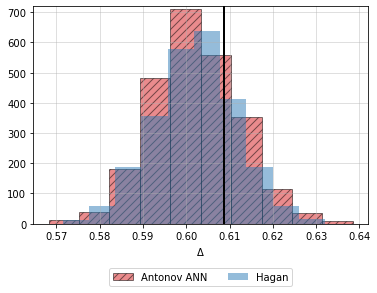

In [70]:
ax = plt.subplot()
plt.hist(samples_antonov['delta'], alpha=.5, label='Antonov ANN', color=colors[0], hatch='///', edgecolor='black')
plt.hist(samples_hagan['delta'], alpha=.5, label='Hagan', color=colors[3])

ymax = 720
plt.ylim(0,ymax)
plt.vlines(delta_real,0, ymax, color='black', linewidth=2, antialiased=False)
# plt.xlim(.1,.5)

# labels = ['Training data', 'Validation data']
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), ncol=2)

plt.xlabel('$\Delta$')

plt.grid(alpha=.5)

# plt.savefig(save_path + '/bayesian_delta.png', bbox_inches='tight')


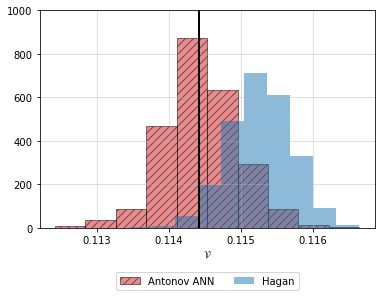

In [72]:
ax = plt.subplot()
plt.hist(samples_antonov['vega'], alpha=.5, label='Antonov ANN', color=colors[0], hatch='///', edgecolor='black')
plt.hist(samples_hagan['vega'], alpha=.5, label='Hagan')

ymax = 1000
plt.ylim(0,ymax)
plt.vlines(vega_real, 0, ymax, color='black', linewidth=2, antialiased=False)

plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), ncol=2)
plt.xlabel('$\mathcal{V}$')

plt.grid(alpha=.5)

# plt.savefig(save_path + '/bayesian_vega.png', bbox_inches='tight')


### Smile good fit

In [8]:
T = 30/365
r=0.0
alpha =0.4
beta = 0.5
rho = .3
v = 2.0
# smile = hf.simulateSABRSmile(1e5, 50, T, r, 1, alpha, beta, rho, v, (0.4,1.65,0.05), 43)
smile = MMC.simulateSABRSmile(5e5, 50, T, r, 1.0, alpha, beta, rho, v, (0.4,1.65,0.05), smoothing=False)

# T = 30/365
# r=0.0
# alpha =0.6
# beta = 0.5
# rho = -.4
# v = 1.2
# # smile = hf.simulateSABRSmile(1e5, 50, T, r, 1, alpha, beta, rho, v, (0.4,1.65,0.05), 43)
# smile = MMC.simulateSABRSmile(5e5, 50, T, r, 1.0, alpha, beta, rho, v, (0.4,1.65,0.05), dx=1e-7)

fit = SABR.add_fit([ AntonovANN(), Hagan()], alpha=alpha, beta=beta, rho=rho, v=v, market_smile=smile.copy(), strike_price=False)
fit = fit.set_index('strike_price')

In [9]:
delta_real = SABR.delta(AntonovANN(), alpha, beta, rho, v, (1,1), T)
vega_real = SABR.vega(AntonovANN(), alpha, beta, rho, v, (1,1), T)

delta_real = float(smile.loc[smile['strike'] == 1.0, 'delta'])
vega_real = float(smile.loc[smile['strike'] == 1.0, 'vega'])


dF: -0.35631717507561556
1.0314229310354195


In [10]:
print(delta_real)
print(vega_real)

0.4791559309444966
0.11758623351430104


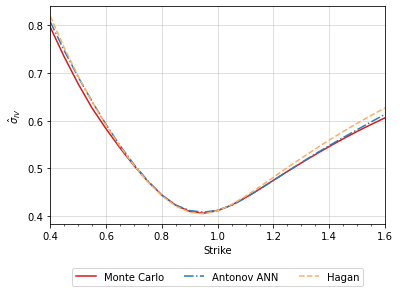

In [11]:
ax = plt.subplot()
plt.plot(fit['impl_volatility'], color=colors[0])
plt.plot(fit['Antonov ANN'], color=colors[3], ls='-.')
plt.plot(fit['Hagan'], color=colors[1], ls='--')

plt.xlim(.4,1.6)
plt.xlabel('Strike')
plt.ylabel('$\hat{\sigma}_{IV}$')

ax.xaxis.set_minor_locator(MultipleLocator(.05))
ax.yaxis.set_minor_locator(MultipleLocator(.1))

labels = ['Monte Carlo', 'Antonov ANN', 'Hagan']
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), labels=labels, ncol=3)

plt.grid(alpha=.5)

# plt.savefig(save_path + '/bayesian_smile_good.eps', bbox_inches='tight')

### Plot greeks

In [12]:
samples_antonov = pd.read_pickle(data_path + '/samples_antonov_good.pkl')
samples_hagan = pd.read_pickle(data_path + '/samples_hagan_good.pkl')

In [13]:
ANN = AntonovANN()
samples_antonov['delta'] = samples_antonov.apply(lambda x: SABR.delta(ANN, x[0], .5, x[1], x[2],(1,1), T), axis=1)
samples_hagan['delta'] = samples_hagan.apply(lambda x: SABR.delta(Hagan(), x[0], .5, x[1], x[2],(1,1), T), axis=1)

samples_antonov['vega'] = samples_antonov.apply(lambda x: SABR.vega(ANN, x[0], .5, x[1], x[2],(1,1), T), axis=1)
samples_hagan['vega'] = samples_hagan.apply(lambda x: SABR.vega(Hagan(), x[0], .5, x[1], x[2],(1,1), T), axis=1)

dF: -0.25190899183763493
dF: -0.3846066272561455
dF: -0.27664165065693913
dF: -0.3113452043326803
dF: -0.4567185851708788
dF: -0.3461186265815708
dF: -0.23178947871071998
dF: -0.4141569835899861
dF: -0.4121014042360316
dF: -0.29009432687854275
dF: -0.23375971922756644
dF: -0.4207652391016725
dF: -0.3151763121705953
dF: -0.3773054486272409
dF: -0.29208174769673745
dF: -0.3458010947840484
dF: -0.34300669477654866
dF: -0.42545123075277136
dF: -0.37463434688467245
dF: -0.41677447886551144
dF: -0.41246971731884186
dF: -0.3588080694219564
dF: -0.27684105588232644
dF: -0.20729896553828286
dF: -0.337337992782627
dF: -0.3595633655173458
dF: -0.26499873745311486
dF: -0.32639550311686083
dF: -0.3792033695793062
dF: -0.29973135034111476
dF: -0.26456403834973496
dF: -0.43106453007452084
dF: -0.27963874649067355
dF: -0.3930611591199118
dF: -0.41694458178670457
dF: -0.3602705902122638
dF: -0.2811737713986906
dF: -0.38560762191164333
dF: -0.26567697271717705
dF: -0.4034595660565299
dF: -0.309410672546

dF: -0.3466663658990843
dF: -0.2571660557063038
dF: -0.31522769859598787
dF: -0.3722584473137003
dF: -0.3497779011693569
dF: -0.45193722535974423
dF: -0.37172930027334905
dF: -0.3438424338680912
dF: -0.2915136872366775
dF: -0.331636625441889
dF: -0.40699450811532145
dF: -0.38856856935803874
dF: -0.17434901910112766
dF: -0.16613397835790744
dF: -0.36697490854969983
dF: -0.2019544737585921
dF: -0.28108318840536217
dF: -0.3320049607444253
dF: -0.3081011106437215
dF: -0.2819126975867059
dF: -0.3041945099568899
dF: -0.1966681654436142
dF: -0.3482302607968335
dF: -0.31033820396902945
dF: -0.2580130757695587
dF: -0.37480559162028637
dF: -0.3278564481587476
dF: -0.24621626878773561
dF: -0.3272674398707709
dF: -0.5478732976915701
dF: -0.37017768102109994
dF: -0.1871996603849957
dF: -0.34889651705699576
dF: -0.29548480691671264
dF: -0.44660707241434006
dF: -0.3266222281517184
dF: -0.24889933490063187
dF: -0.2651396110370241
dF: -0.3023677170110872
dF: -0.3554587301574097
dF: -0.2831184770096806


dF: -0.30777655950803284
dF: -0.3592060037618805
dF: -0.41882500062317973
dF: -0.295626854761033
dF: -0.3160247829561702
dF: -0.43738276321286795
dF: -0.3850852843811925
dF: -0.29677349472817527
dF: -0.37992178843648805
dF: -0.30609927607921916
dF: -0.38285674828525407
dF: -0.3314376400537222
dF: -0.28545126211476646
dF: -0.45039946530545105
dF: -0.3764275205445089
dF: -0.24074803985557613
dF: -0.458244148454634
dF: -0.2986429152504466
dF: -0.2964195433638461
dF: -0.34500145494414935
dF: -0.1996818575028536
dF: -0.17891193797830995
dF: -0.35470780351209985
dF: -0.49233659846464883
dF: -0.33899191374725524
dF: -0.3375467292565659
dF: -0.3223292671583611
dF: -0.45825949087363593
dF: -0.38447717106981916
dF: -0.4355714382450748
dF: -0.2631418430162902
dF: -0.35587361544325846
dF: -0.24823695804782053
dF: -0.32979427831841823
dF: -0.3638135201208814
dF: -0.33429425317255124
dF: -0.3780107440559677
dF: -0.24152327161713893
dF: -0.28200790364363293
dF: -0.3717526090962764
dF: -0.366555789749

dF: -0.4079588397165601
dF: -0.3578193086892223
dF: -0.29063872194728946
dF: -0.3751033376769852
dF: -0.46890923462800105
dF: -0.19611450269546582
dF: -0.3328467555135939
dF: -0.28796971464184473
dF: -0.2840588009059286
dF: -0.36886673649705326
dF: -0.36258622732654455
dF: -0.2972325153627331
dF: -0.24339480159840665
dF: -0.3628842516864572
dF: -0.33842688391155784
dF: -0.35285888291380907
dF: -0.41875758707399235
dF: -0.36113028611506337
dF: -0.27422000734994567
dF: -0.29822325613493295
dF: -0.40846938163696667
dF: -0.32185778296611733
dF: -0.39915545234692207
dF: -0.34337338355200364
dF: -0.29359390976591015
dF: -0.38500858072415545
dF: -0.2272484205059766
dF: -0.3478500482081981
dF: -0.33048619013265057
dF: -0.22524177742011542
dF: -0.40953831393186757
dF: -0.41138089964781743
dF: -0.28461195673373796
dF: -0.2920199847311622
dF: -0.295435452689341
dF: -0.33088175097867323
dF: -0.3265579413189168
dF: -0.40319551929068886
dF: -0.26159088308691514
dF: -0.24473587632745097
dF: -0.346799

dF: -0.47284965766558607
dF: -0.3649095059779506
dF: -0.25820563910622374
dF: -0.312812844803223
dF: -0.3046584307922484
dF: -0.2676805828435991
dF: -0.36289521314153417
dF: -0.37843593573422263
dF: -0.384951779602849
dF: -0.37464899080547065
dF: -0.40773183865694396
dF: -0.38846174654716403
dF: -0.36596442892167236
dF: -0.49507372286372586
dF: -0.327820871818818
dF: -0.4129447913728268
dF: -0.20734004676697948
dF: -0.32604847875622456
dF: -0.30214703936326526
dF: -0.2927210560640936
dF: -0.3999759331252406
dF: -0.4549977912729486
dF: -0.279384591560794
dF: -0.305421165213704
dF: -0.3672733586571053
dF: -0.3989568995224624
dF: -0.33219381020604954
dF: -0.288117292047696
dF: -0.34785413259103004
dF: -0.46347603132601556
dF: -0.3266913410343575
dF: -0.25016429053059674
dF: -0.4166703171748498
dF: -0.302026630779606
dF: -0.32555079753276983
dF: -0.4015198604725989
dF: -0.43284640729140955
dF: -0.33524340298574096
dF: -0.2876648780694713
dF: -0.34949566394659737
dF: -0.22224150897171002
dF

dF: -0.2897019115719046
dF: -0.3231350280624712
dF: -0.37175607558781465
dF: -0.4044299725031175
dF: -0.3411696857227864
dF: -0.3213996907472372
dF: -0.4075209869899843
dF: -0.4123286468329934
dF: -0.3699850983548969
dF: -0.41663128940466754
dF: -0.2568800987592934
dF: -0.3908780818875912
dF: -0.3564202866318533
dF: -0.4832469265972361
dF: -0.476987874110657
dF: -0.41470940617155394
dF: -0.3944082115719949
dF: -0.45628488331672656
dF: -0.30373731863736486
dF: -0.26842736780274823
dF: -0.4220038585639463
dF: -0.27895207001388256
dF: -0.3973151525005214
dF: -0.37932335552715024
dF: -0.5889106935794142
dF: -0.3329492043924187
dF: -0.3574540692383166
dF: -0.46630409451964283
dF: -0.3870501297034701
dF: -0.3876823223900039
dF: -0.3537763045285969
dF: -0.458150906063326
dF: -0.4300770825707567
dF: -0.2864268363239608
dF: -0.3470165564317673
dF: -0.3058092421251435
dF: -0.4240318418538558
dF: -0.31597990831050415
dF: -0.509172963563953
dF: -0.3656346849870151
dF: -0.40737452864814117
dF: -0.3

dF: -0.38702445277538633
dF: -0.39499284403637924
dF: -0.4222876673135034
dF: -0.33145267313600124
dF: -0.4334521040605388
dF: -0.35784232197466626
dF: -0.5371880887858338
dF: -0.23360730192545365
dF: -0.3878592914854928
dF: -0.32398321412441256
dF: -0.38035433200661606
dF: -0.40770957139807384
dF: -0.3683414413443997
dF: -0.35332440415647426
dF: -0.39596624585441775
dF: -0.38547109397490953
dF: -0.3481392489493307
dF: -0.3148441501552024
dF: -0.45049226505666784
dF: -0.28383137487403287
dF: -0.2794022070279345
dF: -0.4117486668953063
dF: -0.3157896801489479
dF: -0.3461571332732949
dF: -0.24549961776920703
dF: -0.4924457954749717
dF: -0.41571087218084113
dF: -0.3272723735189831
dF: -0.43343556870911737
dF: -0.3698497248136312
dF: -0.3759772558381558
dF: -0.30189459262586205
dF: -0.30041829906429784
dF: -0.43275441449747154
dF: -0.4155943338354784
dF: -0.4015618259547993
dF: -0.3999204670143697
dF: -0.3569100707762063
dF: -0.43476621463311993
dF: -0.3297355650278
dF: -0.3897126960233921

dF: -0.370258646911481
dF: -0.42712804759786893
dF: -0.4583925631382324
dF: -0.4057821412511986
dF: -0.3030327993641668
dF: -0.35199159898080534
dF: -0.45266498577833936
dF: -0.3871570992516893
dF: -0.3750531420249059
dF: -0.3081281333081054
dF: -0.461391019348778
dF: -0.31855868077856897
dF: -0.43482239604847317
dF: -0.36193600223277667
dF: -0.33873785360793995
dF: -0.3843473862899516
dF: -0.2700679539791029
dF: -0.33453539480532424
dF: -0.3033502870550264
dF: -0.4197888614887457
dF: -0.4087537578201239
dF: -0.20267420734826347
dF: -0.4452608621868803
dF: -0.4766354840404774
dF: -0.3985660371136346
dF: -0.40598086508608633
dF: -0.36445303958548836
dF: -0.34756779674433025
dF: -0.34559904813213915
dF: -0.3005437363423624
dF: -0.34708732671334674
dF: -0.46934437355761194
dF: -0.3736538670992551
dF: -0.36672242698820856
dF: -0.4754370502926819
dF: -0.45760758265650514
dF: -0.33015026012994664
dF: -0.39650923653850034
dF: -0.3394278124457806
dF: -0.5029339865547655
dF: -0.4061205358624198

dF: -0.3473180227667183
dF: -0.36440722683106497
dF: -0.3615585525787446
dF: -0.44418905289250743
dF: -0.29976214074689533
dF: -0.5188424842875183
dF: -0.3652834677728145
dF: -0.2703866771455732
dF: -0.49149280011345775
dF: -0.36999457176362105
dF: -0.4348052732455754
dF: -0.3134574853519423
dF: -0.4021250365360274
dF: -0.32219213017603554
dF: -0.32355513580328843
dF: -0.42354021443563594
dF: -0.35577948936882375
dF: -0.36470401176741385
dF: -0.428412065335837
dF: -0.2591605613189163
dF: -0.5091649987709612
dF: -0.4471462006958027
dF: -0.3158651434187476
dF: -0.39298386486114056
dF: -0.2665312596739078
dF: -0.4364358291217285
dF: -0.34235589882219974
dF: -0.5080616964880935
dF: -0.4107183278206916
dF: -0.28182332596465853
dF: -0.5049889518352058
dF: -0.267885045020233
dF: -0.26279174922011483
dF: -0.17453130027295094
dF: -0.44247716756817823
dF: -0.3741365033807509
dF: -0.35624620744967306
dF: -0.2947263345584594
dF: -0.3153373004619042
dF: -0.39756096036264177
dF: -0.35903884658378127

1.030395089675895
1.0304928502768984
1.0285507535806593
1.0233790443556212
1.027069155792315
1.021537710702014
1.0191582399451948
1.0418039190607242
1.0257920137279886
1.0253681981686746
1.0280754265459824
1.0336634614716012
1.0468653306119902
1.0256475028103118
1.0452759487833418
1.0256124114937926
1.03793039316874
1.0374792865924798
1.0219483826864884
1.0471154764982171
1.0259910363707991
1.024645220901732
1.0269391482120582
1.0362857140949755
1.019347715306984
1.050334849189427
1.0116223306236294
1.0235478835785017
1.0342515158182075
1.0202571225312318
1.031659778926164
1.022495798848333
1.0239901508496407
1.0444037290885388
1.0215304880417664
1.047939941759557
1.0348381529542983
1.0422819853037057
1.0211566393780735
1.034954032836377
1.026463827039914
1.0301615525762364
1.0250027981495435
1.0343303456750164
1.0277033728542384
1.0215375640851287
1.0310156591750164
1.0309070846004076
1.0308323258056973
1.0443087412320695
1.0340592046503838
1.0242163738979904
1.0275940443049691
1.0230

1.0212798436348702
1.0260940096912252
1.0437197973495183
1.0217516547056382
1.0486921776506342
1.0357503188965222
1.02847366316966
1.024140493642578
1.0335870209007836
1.022585962101863
1.026954660729995
1.0331847333130972
1.0208306829948
1.0309124544974346
1.033343870672776
1.0226068656410403
1.021834926618892
1.0316466363793908
1.0219509228956425
1.0261423545065984
1.040771180170763
1.0245175122472472
1.0342773508187353
1.0350309912313116
1.0387453044019557
1.0236819029679767
1.0265291320282754
1.0318502290801446
1.0354344974061735
1.024592107767841
1.0298395147376183
1.0165714444423934
1.0394081193204618
1.0356351650267492
1.0273402586127856
1.0238654374944423
1.029342525464827
1.0316720554168213
1.0187429098978962
1.027807274975312
1.0270513633311995
1.0374808232702093
1.0418539942155802
1.023975436429403
1.0303025861599369
1.0381029523132135
1.019062998122433
1.0382774039441323
1.0457748070238915
1.0327244610844333
1.027964247426738
1.0252781871142314
1.0363819251688056
1.02147135

1.0225417030243489
1.0284452848366432
1.030240430663909
1.0252456440951185
1.0369257313241897
1.0315956143983063
1.0388282796958137
1.0345381560900035
1.0276630366695683
1.0220094098176147
1.0284170912397417
1.0266640214937062
1.026299329643654
1.0501591986250558
1.0185936858420064
1.022000710507176
1.0263971196097788
1.0191906632431302
1.0421967541124344
1.0294771522462165
1.0259655440575388
1.035706470423059
1.0209081072401482
1.0214842297526228
1.0165853852800444
1.0397489790825443
1.0315695482526754
1.041262093553208
1.0201933955678033
1.0391185024777316
1.0370799389575192
1.0196786335009422
1.0235407160505416
1.0381605738896127
1.0305801168619677
1.0223390410071809
1.0339569469447474
1.0268939325855375
1.0357669596605668
1.0233820376487346
1.025998708354403
1.0327739078005993
1.0329178591694799
1.024752917378191
1.0245722092352971
1.0272502746991319
1.0368228944612756
1.022887123122429
1.0194465987048429
1.0279799345208618
1.0327287507100325
1.0241326282167673
1.0388578438019769
1

1.0250385453788868
1.031399400026889
1.033973912994146
1.033696617054325
1.0310076351788267
1.0371673917000668
1.043767644765825
1.0310199722349256
1.0326258724202564
1.0411046197522644
1.0280968354445252
1.0261607972392173
1.026100874299829
1.0385937894069608
1.027261679507896
1.0374782214023215
1.0389082048836706
1.0208470276448778
1.025974318675238
1.014327169583662
1.0251714550518765
1.02541647682447
1.0276639612305516
1.0383848876183155
1.0488143432835217
1.0235298605168475
1.0304647692974123
1.020986283384595
1.0396522534747432
1.0342243630681591
1.030579932810305
1.025636797670204
1.037079146882225
1.0240147141943323
1.0286741431433932
1.0349494241029822
1.020477058780167
1.033872847493733
1.0240372990763524
1.02505727863772
1.0400794596707175
1.0251836278565851
1.0240308539338772
1.0268864883652973
1.030571375434386
1.0220456454732019
1.025092828616514
1.0321000911694966
1.0320896206000851
1.0319103283332187
1.02415802004735
1.0269328478795803
1.0421863496556938
1.0382785199500

1.0180920836672103
1.0481658807487415
1.0293018496609907
1.0252834254792509
1.0274303229901305
1.017968130799518
1.0260042356988186
1.0178103629007729
1.0517658730047064
1.0279581168479157
1.0158735711349176
1.0266237377593024
1.029205806808986
1.0388944991640559
1.0284202766752681
1.020475372709162
1.039722988284142
1.0230617950288123
1.0462446684089688
1.0212471808179746
1.02437254526494
1.0221227539225497
1.0282742984901727
1.025197959743096
1.0082005325967591
1.0326565569171442
1.0226999605680853
1.0296883191104889
1.0189005728800105
1.022560838363773
1.0255043078580273
1.0287839660691467
1.0229369140571376
1.0268853858957927
1.045178973376748
1.0336903839613942
1.0265291585900838
1.0354908108445304
1.0241631152391184
1.044063725910982
1.020959548265754
1.0283950586315038
1.022926547822045
1.0266928417967947
1.033317395526534
1.022317411785989
1.025658245771277
1.0258808150775955
1.0257081024492298
1.0258041119820538
1.0246454101206504
1.0296064738188337
1.0284735797386202
1.031259

1.0278184440920546
1.0236545665709418
1.0297934350095295
1.0227695457901143
1.0215577502617479
1.020884487679674
1.029149680093211
1.0225300029853557
1.0235861872415208
1.0267639221220315
1.030231112858493
1.0225176606612485
1.028508997827915
1.033070814602799
1.0252102714383704
1.0331184759546086
1.0436675172018073
1.0264643924723371
1.0245427233926407
1.0257420009018858
1.0240018282325902
1.0252487992315484
1.0314118826337815
1.0269380763705538
1.0223564481312564
1.0279435183105368
1.0251906151095835
1.0327766772005864
1.021495275026485
1.0191630933403806
1.024967808331001
1.0226689268663658
1.028283666614227
1.0239386535032535
1.0288826593637945
1.0242374809210641
1.0220489731596616
1.0349043417287596
1.027645544982303
1.0246778823669311
1.0245854368887142
1.0360876821169374
1.0273643298022717
1.0193118489457142
1.025902053546912
1.019133446370224
1.0324590539556588
1.023717601850993
1.0328720743577047
1.0304281452991337
1.024384285488733
1.0269065269113975
1.027601620259
1.02602086

1.0261151900275989
1.024594765328124
1.021231896327357
1.0192080371707046
1.0247352513378938
1.0213497760921952
1.026473049624832
1.032433754020734
1.023365160463252
1.0259563219383594
1.027958060129397
1.02977543362609
1.0234404567346922
1.0259898865047634
1.0262796150076192
1.0262617553183362
1.0302602669870486
1.023756280253696
1.0245242523598819
1.0205741482857689
1.0344889412330915
1.0234628521313405
1.0211728770909145
1.0300808720031807
1.0308707789852267
1.0312360845635138
1.0226651942729648
1.030889974546756
1.0449274281973397
1.0238213355903691
1.019395245876742
1.024830545193478
1.0283373538277907
1.0327878153396086
1.0270665857692318
1.0214423608789769
1.0260179871224295
1.0240334562844344
1.0240995621871307
1.0311434727058866
1.0249466578252098
1.037710823243998
1.015663526842403
1.0269111829375177
1.0251894157672914
1.0267279334083557
1.0251052935550398
1.0217587280270113
1.041298941080182
1.0258149359201885
1.023177672632991
1.029073693782634
1.0170740794790412
1.02494759

1.030457382190375
1.0236075815348022
1.0266857407995045
1.0369323542311348
1.02221465286767
1.0205222529266478
1.021937599407774
1.0228219573454878
1.0386728681713309
1.0234774529616075
1.024090077387796
1.0267651637765884
1.0260534865377813
1.025132497174397
1.026311059245666
1.0166566826128043
1.0215718530690032
1.031044482620036
1.0243387728497977
1.0216909334995194
1.0186914174320494
1.0298610847991885
1.0237382349542745
1.0273363633184207
1.0255779300283319
1.0272719960316423
1.0243109689483942
1.0290406826349296
1.0311022641701362
1.0255725209765143
1.0332252226666339
1.0302258285907473
1.02392377339805
1.035375994684895
1.0249111765181507
1.0248180119123984
1.0311418884656476
1.0236120352655198
1.0268010369415825
1.017973430597896
1.0273265895033301
1.0232891522363174
1.0217047375604693
1.0235701654312535
1.0187541341111217
1.023300557898843
1.0361655197588249
1.0263446348723892
1.0300860359396813
1.0206278219232479
1.02468150784768
1.0226292353471278
1.025360704118572
1.0273941

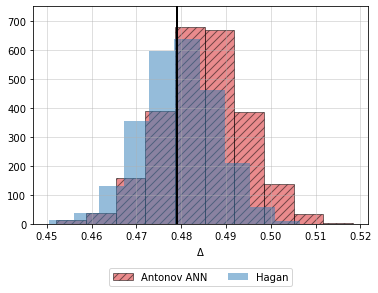

In [14]:
ax = plt.subplot()
plt.hist(samples_antonov['delta'], alpha=.5, label='Antonov ANN', color=colors[0], hatch='///', edgecolor='black')
plt.hist(samples_hagan['delta'], alpha=.5, label='Hagan', color=colors[3])

ymax = 750
plt.ylim(0,ymax)
plt.vlines(delta_real, 0, ymax, color='black', linewidth=2, antialiased=False)
# plt.xlim(.1,.5)

# labels = ['Training data', 'Validation data']
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), ncol=2)

plt.xlabel('$\Delta$')

plt.grid(alpha=.5)

# plt.savefig(save_path + '/bayesian_delta_good.png', bbox_inches='tight')


In [19]:
42*.045

1.89

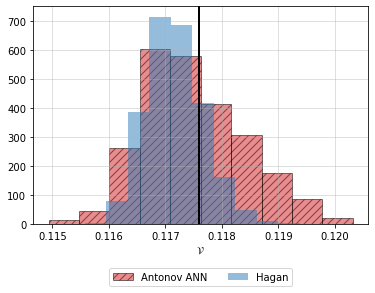

In [15]:
ax = plt.subplot()
plt.hist(samples_antonov['vega'], alpha=.5, label='Antonov ANN', color=colors[0], hatch='///', edgecolor='black')
plt.hist(samples_hagan['vega'], alpha=.5, label='Hagan', color=colors[3])

ymax = 750
plt.ylim(0,ymax)
plt.vlines(vega_real, 0, ymax, color='black', linewidth=2, antialiased=False)

plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), ncol=2)
plt.xlabel('$\mathcal{V}$')

plt.grid(alpha=.5)

# plt.savefig(save_path + '/bayesian_vega_good.png', bbox_inches='tight')


### SPX smile

In [73]:
from src.classes import DataImporter
data_importer = DataImporter()

0.01021122932434082
0.007999420166015625


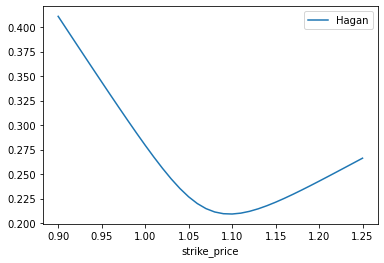

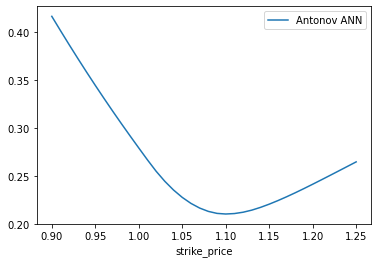

In [152]:
smile = data_importer.smile_days(20200504, 30, n_strikes=25)

hagan = SABR.calibrate_smile(smile, Hagan(), beta=beta,strike_price=False)
ann = SABR.calibrate_smile(smile, AntonovANN(), beta=beta,strike_price=False)

fit_hagan = SABR.add_fit(Hagan(), hagan[0].x[0], .5, hagan[0].x[1], hagan[0].x[2], smile)
fit_ann = SABR.add_fit(AntonovANN(), ann[0].x[0], .5, ann[0].x[1], ann[0].x[2], smile)

fit_hagan = SABR.plot_SABR(Hagan(), hagan[0].x[0], .5, hagan[0].x[1], hagan[0].x[2], smile['T'][0], strike_bounds=(.9, 1.25), strike_step=.01)
fit_ann = SABR.plot_SABR(AntonovANN(), ann[0].x[0], .5, ann[0].x[1], ann[0].x[2], smile['T'][0], strike_bounds=(.9, 1.25), strike_step=.01)

fit_hagan = fit_hagan.set_index('strike_price')
fit_ann = fit_ann.set_index('strike_price')

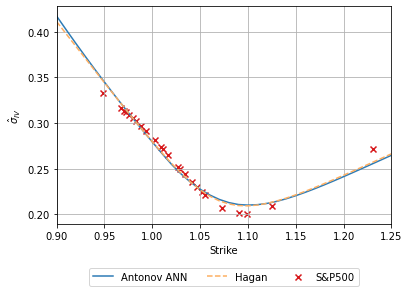

In [160]:
ax = plt.subplot()
plt.scatter(smile['strike'], smile['impl_volatility'], marker='x', color=colors[0])
plt.plot(fit_ann['Antonov ANN'], color=colors[3], ls='-')
plt.plot(fit_hagan['Hagan'], color=colors[1], ls='--')
plt.xlabel('Strike')
plt.ylabel('$\hat{\sigma}_{IV}$')
plt.xlim(.9, 1.25)

labels = ['Antonov ANN', 'Hagan', 'S&P500']
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), labels=labels, ncol=3)

plt.grid()

# plt.savefig(save_path + '/bayesian_spx_smile.eps', bbox_inches='tight')

In [117]:
samples_antonov = pd.read_pickle(data_path + '/samples_antonov_spx.pkl')
samples_hagan = pd.read_pickle(data_path + '/samples_hagan_spx.pkl')

ANN = AntonovANN()
samples_antonov['delta'] = samples_antonov.apply(lambda x: SABR.delta(ANN, x[0], .5, x[1], x[2],(1,1), T), axis=1)
samples_hagan['delta'] = samples_hagan.apply(lambda x: SABR.delta(Hagan(), x[0], .5, x[1], x[2],(1,1), T), axis=1)

samples_antonov['vega'] = samples_antonov.apply(lambda x: SABR.vega(ANN, x[0], .5, x[1], x[2],(1,1), T), axis=1)
samples_hagan['vega'] = samples_hagan.apply(lambda x: SABR.vega(Hagan(), x[0], .5, x[1], x[2],(1,1), T), axis=1)

dF: 0.9887348911291616
dF: 1.360355768509347
dF: 1.4093219966193615
dF: 1.2314921308761995
dF: 1.5323217404644707
dF: 1.3264753495254022
dF: 1.0738422624451127
dF: 1.0933330471146752
dF: 1.3880652739170496
dF: 1.3253425297854449
dF: 1.1780060915300705
dF: 1.1893455986372592
dF: 1.3373671124417008
dF: 1.204097271466642
dF: 1.2375320863616812
dF: 1.1357383975807434
dF: 1.1131086341636953
dF: 1.0009094010282604
dF: 1.2564760067776404
dF: 1.014087944141151
dF: 1.0252872275451352
dF: 1.0114048658022012
dF: 1.4120972217718242
dF: 1.2332829232267195
dF: 1.3907605764168496
dF: 1.0966092159070406
dF: 1.1286334970050937
dF: 1.2219253058332047
dF: 1.2331758653158498
dF: 0.9308959870196754
dF: 1.241024000926405
dF: 1.0666240501902569
dF: 1.1790046519738473
dF: 1.3571553412816684
dF: 1.131244426861855
dF: 1.168130182235827
dF: 1.2855757878504903
dF: 0.986853760733819
dF: 1.3791486090036775
dF: 1.3392769719516862
dF: 1.2791946306309199
dF: 1.0949691924005966
dF: 1.279372707480575
dF: 1.3577667878372

dF: 1.1705543927958972
dF: 1.4146889190541634
dF: 1.2860323008506702
dF: 1.218851342121574
dF: 1.0514135390521373
dF: 1.1452418653720708
dF: 1.1955658703804994
dF: 1.0290313232289017
dF: 1.4122703625024657
dF: 1.2852201026802845
dF: 1.054331829066224
dF: 1.2643512677376623
dF: 1.0171025517632937
dF: 1.228822507660654
dF: 1.0991746299091054
dF: 1.1995795618369165
dF: 1.0024116605672484
dF: 1.2101131109309993
dF: 1.4024911428348052
dF: 1.285822734971298
dF: 1.4509533403450625
dF: 1.2000882482143815
dF: 1.0892847311635978
dF: 1.1201370418173484
dF: 1.0440005439077416
dF: 1.0242354737349801
dF: 1.3005002772020768
dF: 1.1848795281677038
dF: 1.1795359855798493
dF: 1.3163555790990378
dF: 1.343192587852371
dF: 1.2445465624988383
dF: 1.134905854785484
dF: 1.3837985827844235
dF: 1.1978194170533807
dF: 1.1280821703790744
dF: 1.2339833615826468
dF: 1.1569823818682878
dF: 0.8377078441090813
dF: 0.9719958948375962
dF: 0.9683697588547258
dF: 1.3041618204612249
dF: 1.0683680440082277
dF: 1.21528357988

dF: 1.0659582937044831
dF: 1.4191084544173949
dF: 1.2667770706614734
dF: 1.25355399151178
dF: 1.2091219008669718
dF: 1.0735144621956683
dF: 1.101253232106414
dF: 1.3124663668143133
dF: 0.9364088824548311
dF: 1.166739840673392
dF: 1.4133973855626203
dF: 1.4196433260899033
dF: 1.1630863760120347
dF: 1.2650373782177593
dF: 1.1627462052610227
dF: 1.2564243158441624
dF: 1.3888597691766313
dF: 1.53177316946973
dF: 1.241390565527578
dF: 1.1111491687501585
dF: 1.068846016523961
dF: 1.3470206534510476
dF: 1.2055183399312108
dF: 1.4474882932202782
dF: 1.1617632707122683
dF: 1.3129677271200846
dF: 0.9912610321607951
dF: 1.2974280203226218
dF: 1.277566183434664
dF: 1.382509580230562
dF: 1.150469376499097
dF: 1.4437050539523044
dF: 1.3058018290162954
dF: 1.1316073702871687
dF: 1.5403036360930877
dF: 1.1256277199903075
dF: 1.0881206703594604
dF: 1.2986129387571044
dF: 1.4438520518567088
dF: 1.3371996201766434
dF: 1.1673071535844848
dF: 1.2035636357654589
dF: 1.2129581671838086
dF: 1.1362730833899826

dF: 1.0173928422252398
dF: 1.243133597632895
dF: 1.3535734381034392
dF: 1.1742709575243704
dF: 1.2609279031441933
dF: 1.2629539875161355
dF: 1.0844314932750843
dF: 1.0070670935752313
dF: 1.1402231865709211
dF: 1.0592323655594926
dF: 0.9836573800306447
dF: 1.1429897603787431
dF: 1.224073018086247
dF: 1.1565337253707786
dF: 1.1386192051648925
dF: 1.193395477450676
dF: 1.1100257727089669
dF: 1.3824920223809434
dF: 1.1528187121734312
dF: 1.1822511125222923
dF: 0.9817188279556688
dF: 1.241282440277991
dF: 1.117429375266099
dF: 1.4698190694145685
dF: 1.2998050882989665
dF: 1.119621082798783
dF: 1.270686857839931
dF: 1.1324043662361283
dF: 1.0918382579272468
dF: 1.295541978682535
dF: 1.1822152092855198
dF: 1.3290404980950687
dF: 1.1184440783665317
dF: 1.1770994583396033
dF: 1.0809452434451527
dF: 0.9607718755832995
dF: 1.2287333474655937
dF: 1.0547333071889153
dF: 1.2341178687230725
dF: 1.2202119412685342
dF: 1.1663765890052025
dF: 1.5114309773880952
dF: 1.2068149043401033
dF: 1.1614912891791

dF: 1.4622100383351877
dF: 1.2690627556150025
dF: 1.1789410093393515
dF: 1.0608752681864897
dF: 1.3233536423831738
dF: 1.401823388088308
dF: 1.1559770963634475
dF: 1.4051379945628772
dF: 1.3513132723150245
dF: 1.235525482997657
dF: 1.2386340398118367
dF: 1.1090856477724564
dF: 1.232603924273823
dF: 1.3910193652719172
dF: 1.2116167256659427
dF: 1.0678859865403956
dF: 1.2288212417005395
dF: 1.2023559868218348
dF: 1.0006912506171917
dF: 1.199097439846808
dF: 0.9676253738505336
dF: 1.3983380235846332
dF: 1.2701537684634001
dF: 1.3743736790380878
dF: 1.466884921781375
dF: 1.2283891923534074
dF: 1.3610391035401292
dF: 1.2322771703876523
dF: 1.2511205790460833
dF: 1.1086482614755533
dF: 1.1408322114656033
dF: 1.274362423019093
dF: 1.2804783688621924
dF: 1.2641014130254646
dF: 1.2979159192696987
dF: 1.136294196449894
dF: 1.2058894545433074
dF: 1.1133736454754795
dF: 1.4898510816882538
dF: 1.4400263696304205
dF: 1.2930158320423324
dF: 1.3744124647810385
dF: 1.3099472920546917
dF: 1.083688853939

dF: 1.0895490222878612
dF: 1.0829620279198537
dF: 1.075015743577934
dF: 1.120921012517928
dF: 1.285113592739695
dF: 1.313963671020768
dF: 1.4204467062739479
dF: 1.3412870451681713
dF: 1.2149233300190465
dF: 1.2690704111273376
dF: 1.4769834243452684
dF: 1.0404289118706722
dF: 1.251958366910444
dF: 1.0458612847330517
dF: 1.1897820871381581
dF: 1.3335740937492346
dF: 1.3432218322623202
dF: 1.1035267390477332
dF: 1.1208890077374356
dF: 1.1368165777483896
dF: 1.1605556374294501
dF: 1.1041770582159716
dF: 1.332841868812995
dF: 1.1522838266853075
dF: 1.1827397702868225
dF: 1.253853398315019
dF: 1.232118004214633
dF: 1.5078585908939734
dF: 1.2364020086214067
dF: 0.9795350046631901
dF: 1.1280472039532086
dF: 1.2999306228683727
dF: 1.1119944795651149
dF: 1.3228562749351136
dF: 1.112874077812409
dF: 1.2448832991060477
dF: 1.0993436067885387
dF: 1.239160210827206
dF: 1.1918163555726946
dF: 1.181815812698328
dF: 1.1117034396782022
dF: 1.069194422346209
dF: 0.9770785016285921
dF: 0.9962726253376353


dF: 1.1119160515613014
dF: 1.0716118907605487
dF: 1.351513993720077
dF: 1.156502593703812
dF: 1.1745873020946318
dF: 1.506746945577342
dF: 1.4190411173778394
dF: 1.2873635692531304
dF: 1.2768481649599872
dF: 1.3123644890369879
dF: 1.2055127505847252
dF: 1.0891789259392937
dF: 1.1280758731704865
dF: 1.1876694857415604
dF: 1.0706738783183845
dF: 0.9885139639362328
dF: 1.2276450978918052
dF: 1.305744566365008
dF: 1.3748690488590842
dF: 1.0907665087470098
dF: 1.2788465450241926
dF: 1.1931960467212455
dF: 1.2642508780361106
dF: 1.2382186910683823
dF: 1.0913255202141259
dF: 1.264483310089437
dF: 1.2731654725942065
dF: 1.1397208646285462
dF: 1.5170127456085036
dF: 1.046591073642078
dF: 1.2226578205160044
dF: 1.458588366166358
dF: 1.1916275045081859
dF: 1.1582115828012718
dF: 1.097500007689045
dF: 1.1826231941147736
dF: 1.2106358764291114
dF: 1.194818068610548
dF: 1.357907021301008
dF: 1.326302152942771
dF: 1.0984005977762723
dF: 1.2149802978908553
dF: 1.044020605673046
dF: 1.3134816808305083


dF: 1.1209206563422836
dF: 1.2975955954838692
dF: 0.9790838366668941
dF: 1.1198783527907596
dF: 1.1781932640414494
dF: 1.004989891698893
dF: 1.2145911052940939
dF: 1.2655326292812519
dF: 1.032739441395314
dF: 1.2270617941217976
dF: 1.2988294483726182
dF: 0.8828529415225161
dF: 1.1247370301206705
dF: 1.0305100493857022
dF: 1.097157914900504
dF: 1.2966544247611234
dF: 1.2276034727939922
dF: 1.2554442303910895
dF: 0.9840699936325414
dF: 1.1017137230970309
dF: 0.8889678670925827
dF: 1.3047425048395844
dF: 1.0626536570049194
dF: 1.1051968345296426
dF: 0.9197761044332786
dF: 1.1213804933377092
dF: 1.2051859524706
dF: 1.4174009952544475
dF: 1.3136942644495497
dF: 1.1446879976889646
dF: 1.6719450293603555
dF: 1.1949436944411196
dF: 0.9566204800828815
dF: 1.2763398625184608
dF: 1.2630626704515646
dF: 1.5064338251485898
dF: 0.939667031528979
dF: 1.176128763306361
dF: 1.3276137867707094
dF: 1.1579290202667902
dF: 1.4714253237962938
dF: 1.0753372699137675
dF: 1.2030759798348223
dF: 1.2602832857758

dF: 1.4494757407398917
dF: 1.0291811370580217
dF: 1.2148820480922806
dF: 1.3300606967181494
dF: 1.0855674020193717
dF: 0.9444144936748833
dF: 0.937075045598923
dF: 1.0997078318661369
dF: 1.1786873808389275
dF: 0.9557291701592363
dF: 1.2202357404045294
dF: 1.2839506082235053
dF: 1.469017271554518
dF: 1.1225368819051118
dF: 0.9727946563101164
dF: 0.9775687112792419
dF: 1.424739387769769
dF: 0.9168295617176248
dF: 1.2422849293797222
dF: 1.175477228768651
dF: 1.1644362181384427
dF: 1.1599327052852493
dF: 1.146393262730916
dF: 1.2871428989788547
dF: 1.087602365448248
dF: 0.9801613443943813
dF: 1.2820059636367565
dF: 0.9911986137733919
dF: 0.940124993681346
dF: 1.225819340077705
dF: 1.0699548129081138
dF: 0.9561839444721665
dF: 1.0783819551257734
dF: 1.3157542106539966
dF: 1.1147544564596434
dF: 1.330151118202616
dF: 1.552707924954988
dF: 1.1966037476648927
dF: 1.189197070037007
dF: 1.4220525670874395
dF: 1.2888860670917657
dF: 1.0299604021321573
dF: 1.269490086972802
dF: 1.2765612583814923


0.9976488491164615
1.0011775937279754
0.9715530382853332
1.0035076036213342
0.9854430326300401
0.9977505771843753
1.0054478339319162
0.979336733670233
0.965977218024272
1.0146998204985103
0.997934883703866
1.00613698501395
0.9734658244120453
0.969278318773692
1.0009723605702847
0.9956766466845401
1.0055050805057864
0.9730252296941133
0.9565713902009998
0.9939328438229866
0.9535481452105365
0.9698757347073594
0.9929964633101362
0.9831308559488106
1.0098194552751738
1.0072714232842173
0.9567888458059115
0.9544552271611995
0.972729373688308
0.9524351591574942
0.978964159712159
0.9801226442596178
1.0029273409498107
0.9940536391644939
0.9228529942348351
1.0064879517723835
0.9733244796680807
1.0150184449556066
0.9688054430304072
0.9949897618530268
0.9920989277273362
0.9944749380552675
1.0132956260683335
0.9553637082720945
0.9969431814910168
1.0053916324481715
1.0057561219076194
0.9833505952794308
0.9591318752039113
0.9897774945188953
0.9575824730567728
0.9848071176479789
1.0045545979972537
1

1.0000813568619704
0.9942039262003655
0.9689254442302175
0.96038613884325
0.9949980755089016
0.9647169149321067
1.0070064515910193
1.010165557950582
0.9541489987754947
0.9776105889991449
1.0059787402877385
1.0073363751406106
0.9737486026042963
0.9738361725403211
1.0162373064223629
1.0059472499979183
0.9973543442873267
0.9964739345585949
0.9952542636584849
0.9649602843880833
1.0098660284815764
0.9568315862351628
1.011376537670139
0.9718962140811693
1.0083973964170045
0.9661476537672908
1.0109042142819602
0.9660959676172087
0.9329347064257476
0.9550072943736998
1.0039820105522956
0.9858041151994401
0.9866488043935862
0.9668244119787062
0.9780175356774445
0.9986302723299922
0.9567474792604447
0.9831197802931402
0.960378556501551
1.0085489230091116
0.996037035679298
1.0109928426935144
0.9649325571364775
1.0077924734080979
1.0157061031798587
1.006315668821145
0.99108800828418
0.9968027789861167
0.9667471680574469
1.0086506952847185
0.9941405074503917
0.9807539437198254
0.9956623854345814
1.

0.999407036256228
0.9928652164881147
0.9488876096774845
0.9708850388845391
0.9717318175744838
0.984451652610574
0.996726244496815
1.0082696966542959
0.9695553835736836
0.9731800772141974
1.0075610716370198
0.982307437326635
0.9975824711416781
0.9858096450982012
0.9235641452692844
1.0051464856289383
0.9899741378552318
0.9933304926859621
0.9855276612424912
0.9590439312603949
0.9634196546995377
1.0142254081940694
1.0027344280383321
0.9743290471248001
0.9742184759453654
0.9620003403149058
0.983537553687075
0.9939675363640488
0.9933213056348422
1.0003224804477906
0.988814622051859
0.9838522626784418
1.0027467871631668
0.9780912724771662
0.9403356985401845
0.9624951957240557
0.979816143017731
0.9360837591060323
0.9574921343208365
0.967981122687589
0.985697326165158
0.9855446798315293
1.0061396322899596
1.015117326146342
1.0102878816650729
0.9663140235860457
0.9672036692329189
0.9688814244726562
0.9922487281310843
0.9526788878727599
1.0166623278945464
1.005104567859405
0.9644728741201036
0.95

0.9619416051454
0.9803385913878526
0.9820782883129819
1.0067105201680415
1.0080220237723703
0.9974006254359624
0.9868523154255016
0.9845551206055791
1.0121507919802486
0.954768632684122
0.9978212741629244
1.0090817930746843
0.9562231040172176
1.005158662162886
1.001675680849523
0.9696052170030112
0.9834015139068009
1.0033389532257408
0.9921965095802121
0.95977619266302
1.001606300099489
1.0166707692557675
0.9783063675303239
1.0078351251863182
0.9533263213179488
0.9577087655907035
0.9760042593381923
1.0117669619208458
0.9846241115588072
1.0026426514478382
1.0135066427474637
1.0028126228509016
0.9999833105081568
0.9595276672841324
0.9634276160633282
0.9800129185066897
0.9898134278496507
0.9811618814439815
0.9844201573827593
0.9777965501153729
0.9811915357998968
0.9695143505067394
0.9826026212858552
0.9887249305318146
0.9956489004803171
1.0116873061294385
0.9944162538150225
0.9853420692451653
0.9999899947893409
1.0047568861951128
0.9506513171644859
0.9534408814665385
0.9669096689365886
1.

0.9650213375028693
1.0035146411888074
0.9632374539439437
0.9540742654740031
0.9524979270347789
0.9848245238619491
0.9499059866202586
0.9848269736995041
0.9596903880987329
0.9920368937932356
0.9645553910353488
1.0069291015293858
0.9481878597100701
0.9885314145108293
0.9881750925719301
1.0141917597861205
1.0129433616271055
1.0075735314718504
0.9341413558108802
0.9660590922541679
0.974571037687666
1.006229568348005
1.0082458189483723
0.9667327036777529
1.0024510268630271
0.9461661679338595
1.0124047019921534
0.967645488041402
0.9819284413431495
0.9636232238122155
0.9759365655587215
0.9878945174615628
0.9906810309501246
1.0076227720820508
0.9586926954702202
0.9330106588753551
0.9990029458653571
0.9799822433678718
0.9772833560206529
0.974029393720488
0.9891193475303206
1.0002201044068126
1.0088321730888916
0.9989535021964757
1.0073920830022676
0.9803291880219889
1.0038629034633817
0.9522197036898605
0.9840218496537378
1.0058291402337272
1.0069103479451447
1.0039309358442217
1.00380834202495

0.998465382477387
1.0043693240582852
1.006011840361254
1.0093502179434055
0.990813134950641
1.0049216624744006
0.9927655286531833
1.001082284120547
0.9863938344911727
0.9995450451491528
1.005262785021277
1.00154100697053
1.0015252524847584
0.9904557823114946
1.0095064864629189
0.9991848387805313
1.0017801474829224
1.0017078710872207
0.9965670019113082
1.000812850343591
0.9953853191418949
0.9941660679077535
0.9984586373135151
1.0112064477282856
0.9978575472269213
1.003052460737952
1.0060177716841867
1.0030536534241796
0.9927793790290296
1.0030571725599957
0.9960784917664722
0.9969896468309258
1.0054657267533074
0.9887423540164142
0.995953965394758
1.0090477430407807
1.008512457971178
1.0029331548741527
0.9971239642242447
1.0038427927352989
1.0097481447304824
0.9960062483369003
0.9953777249968598
0.9983250051909254
0.9960042286452642
1.0101309384938362
1.0031801527066175
0.9901273679846501
1.0029416003645708
1.0016490210790208
1.0087308924167093
1.0016781605334812
1.0022350386706957
1.00

0.9911830055042703
0.9985501550774378
0.9925619946182795
0.9973313768241177
0.9961039949085704
0.9996072765891539
0.9886849675089238
0.9994087434245236
0.9809245895694985
1.0005405412155666
1.0049295787342705
0.9949570606401781
1.0046020661649835
1.001336940364972
1.0065712923332248
0.9998723564699774
1.0045877714476292
0.9935953416412291
1.0050766984923132
1.0009237320676712
1.0001982443164081
0.9959720402907823
0.9866016429807556
1.0061078842268922
0.999813776094427
0.9991158294370139
1.0095095532194898
1.004236217920229
1.0002572289516398
1.0029714883422192
1.0003143455436514
1.00045788283043
1.00393768733692
0.993914925464523
1.0002014418070138
0.9998950074471824
1.0060628643260294
0.9801040385584714
0.9947993822742585
0.9951187134821238
0.998302681746166
1.0068869307952588
1.00535261034429
0.9963279889968479
1.0111470864318517
1.00663834826209
1.0094346598624182
0.9881815713064235
1.0000986912928056
1.0028440498011104
0.9984353598904705
1.0021774493007563
1.000831970790761
0.99634

0.9989244540775655
0.9977308314398914
1.0089363508894444
1.0018954900131716
1.0002741682624272
0.9984544216554148
1.0033522571287201
0.9919309408826238
1.0072010913006468
0.9978068671209761
1.002763798731987
0.9998757948515014
1.0016466182716233
1.0037095710196953
0.9966480538647904
0.9971349284088049
1.004249500505816
1.0058157572698234
1.0020717688044578
1.0109586993942155
0.9996532897288413
1.0073161734378
1.000153853323027
1.001917270123387
0.9989151254721773
1.0073663083420836
0.9983623596931945
1.0054991707927896
1.0038264612946546
1.0033458823463515
0.9942175421198685
0.9803667428129326
0.9912894938418626
0.9963533103132804
0.9990627166428512
1.0081233240827325
0.9997125080984937
1.0048603482129548
1.001860877034022
0.9975674900297715
1.0019875813876977
1.0041266180632613
0.999869329366132
1.0041742238572904
1.003476756707422
1.0020868406054873
0.998208331273176
1.0061370235442402
1.0086538604431317
1.0069236119616964
0.9941287363826601
0.9932514521948654
1.0045802135050241
0.99

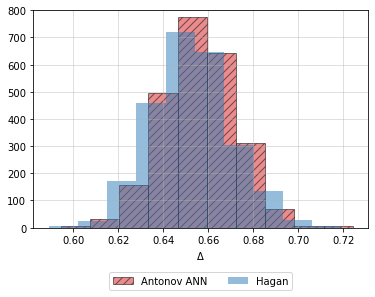

In [141]:
ax = plt.subplot()
plt.hist(samples_antonov['delta'], alpha=.5, label='Antonov ANN', color=colors[0], hatch='///', edgecolor='black')
plt.hist(samples_hagan['delta'], alpha=.5, label='Hagan', color=colors[3])

ymax = 800
plt.ylim(0,ymax)
# plt.xlim(.1,.5)

# labels = ['Training data', 'Validation data']
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), ncol=2)

plt.xlabel('$\Delta$')

plt.grid(alpha=.5)

# plt.savefig(save_path + '/bayesian_delta_spx.png', bbox_inches='tight')

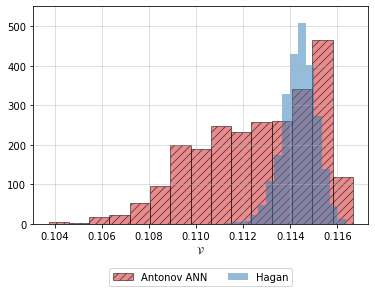

In [142]:
ax = plt.subplot()
plt.hist(samples_antonov['vega'], alpha=.5, label='Antonov ANN', color=colors[0], hatch='///', edgecolor='black', bins=15)
plt.hist(samples_hagan['vega'], alpha=.5, label='Hagan', color=colors[3], bins=15)

ymax = 550
plt.ylim(0,ymax)

plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), ncol=2)
plt.xlabel('$\mathcal{V}$')

plt.grid(alpha=.5)

plt.savefig(save_path + '/bayesian_vega_spx.png', bbox_inches='tight')
